In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [17]:
## Step 1: Load and Preprocess Data
# Define transformations for images
transform = transforms.Compose([
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize images
])

In [22]:
# Load Fashion-MNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

In [19]:
# Get the shape of the first image in the training dataset
image, label = train_dataset[0]
print(image.shape)
print(len(train_dataset))

torch.Size([1, 28, 28])
60000


In [20]:
# Get the shape of the first image in the test dataset
image, label = test_dataset[0]
print(image.shape)
print(len(test_dataset))

torch.Size([1, 28, 28])
10000


In [23]:
# Create DataLoader for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [65]:
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1)
        self.conv2=nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,padding=1)
        self.conv3=nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,padding=1)
        self.pool=nn.MaxPool2d(kernel_size=3,stride=2)
        # Corrected input features for fc1 from 128*3*3 to 128*2*2
        self.fc1=nn.Linear(128*2*2,128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,10)
    def forward(self, x):
      x=self.pool(torch.relu(self.conv1(x)))
      x=self.pool(torch.relu(self.conv2(x)))
      x=self.pool(torch.relu(self.conv3(x)))
      x=x.view(x.size(0),-1)
      x=torch.relu(self.fc1(x))
      x=torch.relu(self.fc2(x))
      x=self.fc3(x)
      return x

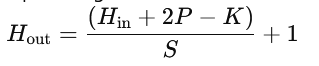

In [40]:
from torchsummary import summary

# Initialize model
model = CNNClassifier()

# Move model to GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    model.to(device)

# Print model summary
print('Name:SATHISH')
print('Register Number:212224040299')
summary(model, input_size=(1, 28, 28))

Name:SATHISH
Register Number:212224040299
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 13, 13]               0
            Conv2d-3           [-1, 64, 13, 13]          18,496
         MaxPool2d-4             [-1, 64, 6, 6]               0
            Conv2d-5            [-1, 128, 6, 6]          73,856
         MaxPool2d-6            [-1, 128, 2, 2]               0
            Linear-7                  [-1, 128]          65,664
            Linear-8                   [-1, 64]           8,256
            Linear-9                   [-1, 10]             650
Total params: 167,242
Trainable params: 167,242
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.37
Params size (MB): 0.64
Estimated Total Size (MB): 1.01
-

In [45]:
# Initialize model, loss function, and optimizer
model =CNNClassifier()
criterion =nn.CrossEntropyLoss()
optimizer =optim.Adam(model.parameters(),lr=0.01)

In [51]:
## Step 3: Train the Model
def train_model(model, train_loader, num_epochs=3):
  for epoch in range(num_epochs):
    model.train()
    running_loss=0.0
    for images,labels in train_loader:
        optimizer.zero_grad()
        outputs=model(images)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()

    # write your code here


        print('Name:SATHISH')
        print('Register Number:212224040299')
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

In [52]:
# Train the model
train_model(model, train_loader)


Streaming output truncated to the last 5000 lines.
Register Number:212224040299
Epoch [3/3], Loss: 0.2569
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2581
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2593
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2606
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2618
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2630
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2642
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2655
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2667
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2679
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2691
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2704
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2716
Name:SATHISH
Register Number:212224040299
Epoch [3/3], Loss: 0.2728
Name:SATHI

In [57]:
## Step 4: Test the Model
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / total
    print('Name:SATHISH')
    print('Register Number:212224040299')
    print(f'Test Accuracy: {accuracy:.4f}')

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    print('Name:SATHISH')
    print('Register Number:212224040299')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print classification report
    print('Name:SATHISH')
    print('Register Number:212224040299')
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=test_dataset.classes))


Name:SATHISH
Register Number:212224040299
Test Accuracy: 0.1000
Name:SATHISH
Register Number:212224040299


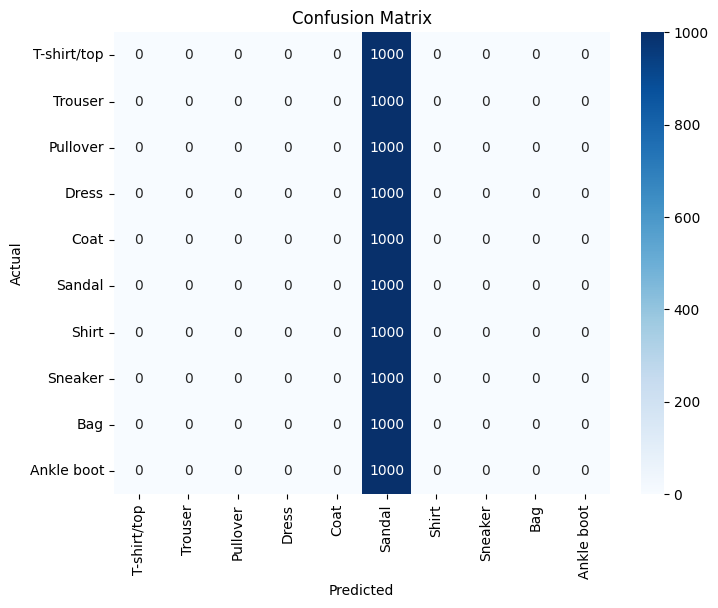

Name:SATHISH
Register Number:212224040299
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.00      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.10      1.00      0.18      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.00      0.00      0.00      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
# Evaluate the model
test_model(model, test_loader)


In [61]:
## Step 5: Predict on a Single Image
import matplotlib.pyplot as plt
def predict_image(model, image_index, dataset):
    model.eval()
    image, label = dataset[image_index]
    with torch.no_grad():
        output = model(image.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(output, 1)
    class_names = dataset.classes

    # Display the image
    print('Name:SATHISH')
    print('Register Number:212224040299')
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[predicted.item()]}')
    plt.axis("off")
    plt.show()
    print(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')


Name:SATHISH
Register Number:212224040299


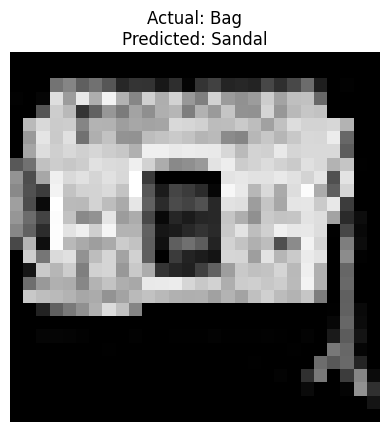

Actual: Bag, Predicted: Sandal


In [64]:
# Example Prediction
predict_image(model, image_index=9856, dataset=test_dataset)